In [1]:
%run pylib/summary
self = Summary(show_confusion=False, #summary_file=None,
             title="""Summarize HCU properties.""")
fignum=11
df = self.df.copy()


# Summarize HCU properties.

<h5 style="text-align:right; margin-right:15px"> 2023-09-20 14:12</h5>

* Read file `files/summary.csv` with 1093 sources.

In [80]:
dr4 =  Fermi4FGL('dr4')
sfplec = [dr4.get_specfunc(name, 'PLEC4') for name in df.index]
sflp = [dr4.get_specfunc(name, 'LP') for name in df.index]

Loaded Fermi 4FGL gll_psc_dr4.fit: 7195 entries


In [85]:
df['dp'] = [sf.curvature(10**sf.epeak*1e3) for sf in sfplec]

In [ ]:
    ep = sfplec.epeak
    d, dp = sflp.curvature(), sfplec.curvature(10**ep*1e3)

## Curvature vs peak energy for pulsar-like sources

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f581cf5a0b0>
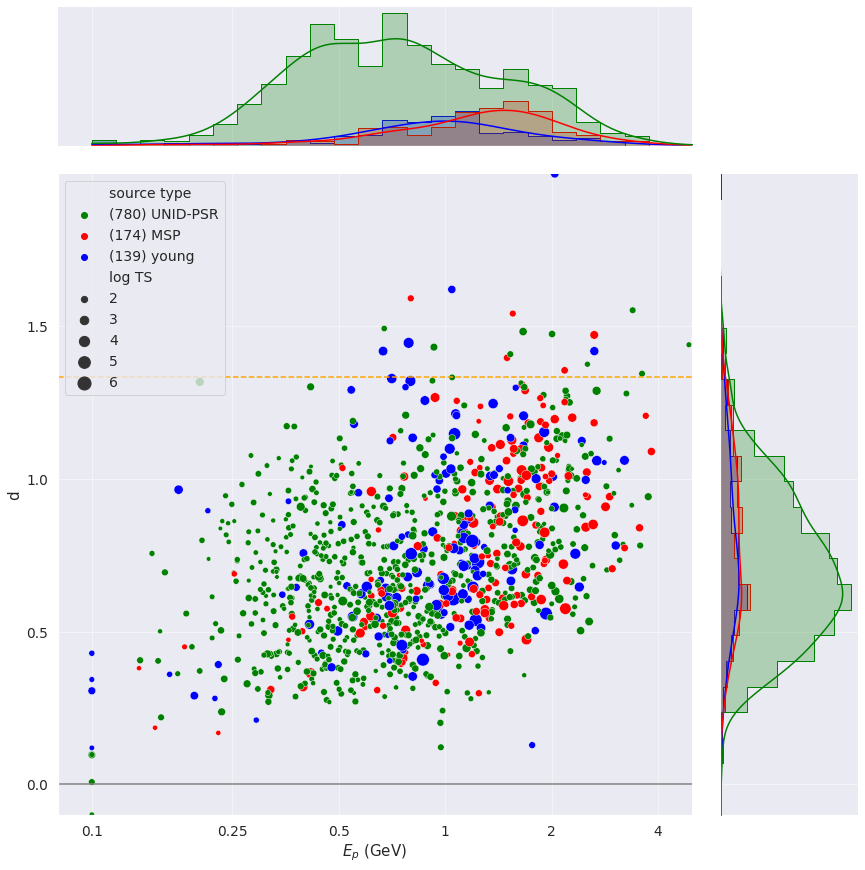

In [93]:
def show_d_vs_ep(self, df, xy='log_epeak d'.split() ):
    show(f""" ## Curvature vs peak energy for pulsar-like sources""")
    # fig, ax = plt.subplots(figsize=(15,8))
    data=df
    x,y =  xy
    g = sns.JointGrid(height=12, ratio=4 )
    ax = g.ax_joint
    size_kw = dict(size='log TS', sizes=(20,200) )
    sns.scatterplot(data, ax=ax, x=x,y=y, **self.hue_kw, **size_kw);
    axis_kw= lambda a, label, v: {f'{a}label':label,f'{a}ticks':np.log10(v), f'{a}ticklabels':v }
    
    ax.set(**axis_kw('x','$E_p$ (GeV)', [0.1, 0.25,0.5,1,2,4]), 
           yticks=np.arange(0,1.51, 0.5), ylim=(-0.1,2), xlim=np.log10((0.08, 5)) )
    ax.axhline(0, color='grey')
    ax.axhline(4/3, color='orange', ls='--')
    xx = np.linspace(-1,np.log10(5)); xx
    # ax.plot(xx, 10**(pulsar_curvature(xx)), 'orange', ls='--');
    
    hkw = dict(element='step', kde=True, bins=25, **self.hue_kw, legend=False)
    sns.histplot(data, y=y, ax=g.ax_marg_y, **hkw)
    sns.histplot(data, x=x, ax=g.ax_marg_x, **hkw)
    
    update_legend(ax, df, hue='source type',  fontsize=14,   loc='upper left')
    show(g.fig)
show_d_vs_ep(self,df)

## Curvature vs peak energy for pulsar-like sources

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f5826f2f7c0>
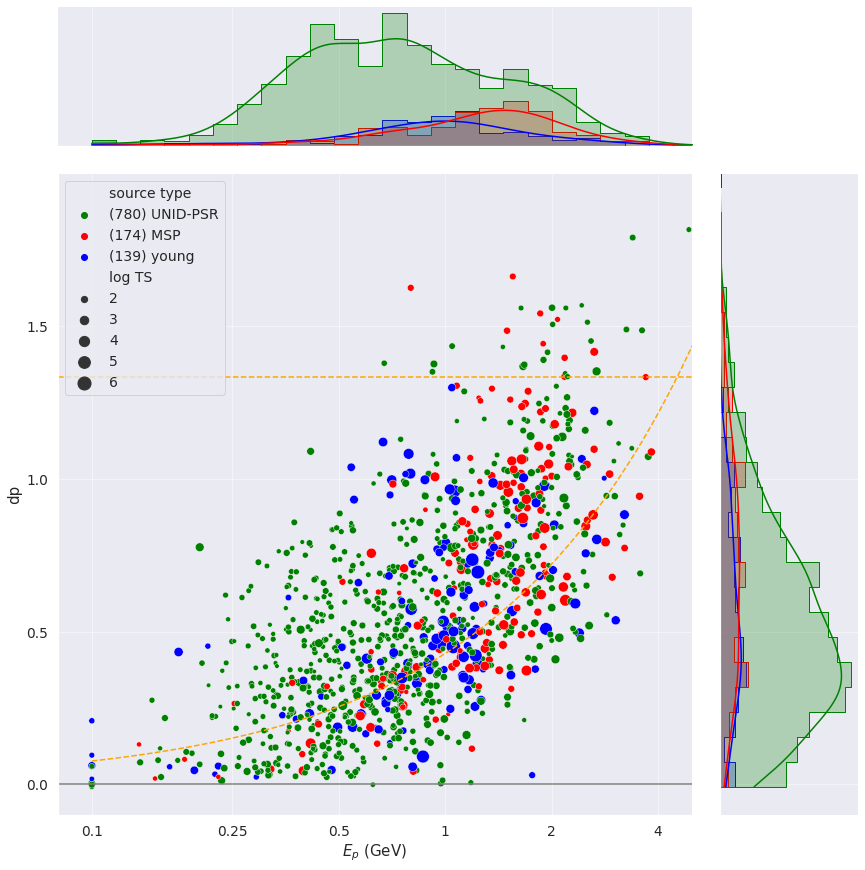

In [89]:
show_d_vs_ep(self,df, 'log_epeak dp'.split())

In [45]:
psr = df[df['source type']!='UNID-PSR'].iloc[:,:-4].copy(); len(psr)

313

In [57]:
psr['psr_name'] = list(map(lambda s:s[:14], dr4.loc[psr.index,'assoc1_name'] ))
psr['class1'] = dr4.loc[psr.index,'class1']
z = psr #.set_index(psr.psr_name, ); z

In [58]:
z.groupby('class1').size()

class1
MSP    136
PSR    134
msp     39
psr      4
dtype: int64

SED plots for low-peak-energy pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f5826a6a770>
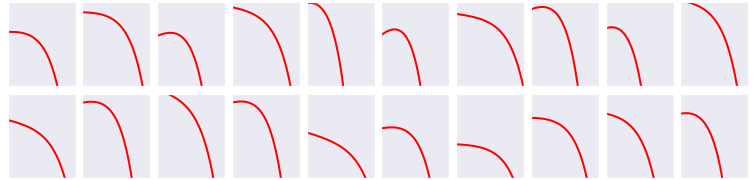

,glon,glat,ts,r95,d,Fp,Ep,source type,psr_name,class1
name,,,,,,,,,,
4FGL J1555.7-2908,344.477,18.482,183.391,0.049,0.501,1.143,0.394,MSP,PSR J1555-2908,MSP
4FGL J1228.0-4853,298.966,13.791,3778.356,0.018,0.319,28.043,0.396,MSP,PSR J1227-4853,MSP
4FGL J1431.4-4711,320.036,12.328,178.753,0.062,0.549,1.153,0.369,MSP,PSR J1431-4715,MSP
4FGL J0540.3-6920,279.704,-31.501,845.799,0.026,0.290,56.319,0.195,young,PSR J0540-6919,PSR
4FGL J0659.7+1416,201.036,8.213,2350.820,0.045,0.965,176.318,0.176,young,PSR J0659+1414,PSR
4FGL J1253.3-5816,303.211,4.601,112.633,0.105,0.927,2.169,0.360,young,PSR J1253-5820,PSR
4FGL J1341.7-6216,308.745,0.003,82.317,0.049,0.210,19.472,0.292,young,PSR J1341-6220,PSR
4FGL J1356.9-6432,309.890,-2.549,1120.871,0.037,0.757,89.557,0.397,young,PSR J1357-6429,PSR
4FGL J2208.1+4058,92.680,-12.163,79.747,0.236,0.896,2.900,0.213,young,PSR J2208+4056,PSR


In [90]:
show('SED plots for low-peak-energy pulsars')# UNID-PSR ')
lowep = z.query('0.15<Ep<0.4').sort_values('class1')
sedplotgrid(lowep, plec=True )
show(lowep)

SED plots for narrow pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f5822e4ad70>
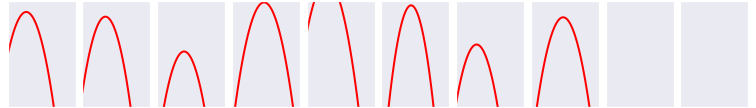

,glon,glat,ts,r95,d,Fp,Ep,source type,psr_name,class1
name,,,,,,,,,,
4FGL J0622.2+3749,175.874,10.974,3061.589,0.024,1.419,46.133,0.667,young,PSR J0622+3749,PSR
4FGL J1056.9-5852,288.596,0.770,643.260,0.040,1.621,24.459,1.044,young,PSR J1057-5851,PSR
4FGL J1402.7+1306,356.455,68.207,145.839,0.061,1.542,0.221,1.553,MSP,PSR J1402+1306,MSP
4FGL J1615.3-5136,331.763,-0.533,1681.386,0.019,1.419,169.274,2.642,young,PSR J1615-5137,PSR
4FGL J1741.9-2054,6.420,4.915,18203.351,0.014,1.446,3113.626,0.788,young,PSR J1741-2054,PSR
4FGL J1827.4-1445,17.092,-1.504,802.573,0.028,2.000,113.299,2.042,young,PSR J1827-1446,PSR
4FGL J2029.5-4237,358.205,-35.509,158.754,0.074,1.592,0.566,0.799,MSP,PSR J2029-4239,MSP
4FGL J2035.0+3632,76.601,-2.346,1028.033,0.024,1.472,22.442,2.640,MSP,PSR J2034+3632,MSP


In [62]:
show('SED plots for narrow pulsars')# UNID-PSR ')
psr 
narrow = psr.query('d>1.4')
sedplotgrid(narrow,)
show(narrow)

## Restrict to DR3

Loaded Fermi 4FGL gll_psc_dr3.fit: 6659 entries


## Curvature vs peak energy for pulsar-like sources

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f5825a11480>
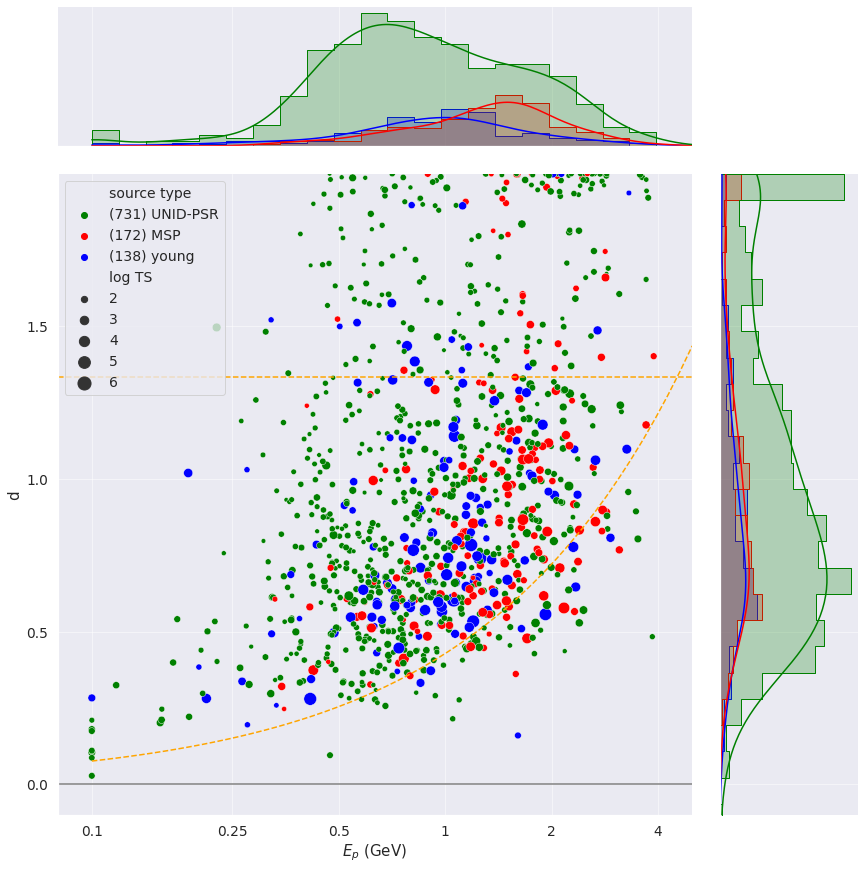

In [4]:
show('## Restrict to DR3')
from pylib.catalogs import  Fermi4FGL
dr3 = Fermi4FGL('dr3')
df3 = self.df[np.isin(df.index, dr3.index)].copy() 
df3['sf']=[dr3.get_specfunc(name, 'LP') for name in df3.index ]
df3['d'] = df3.sf.apply(lambda f: f.curvature())
df3['log_epeak'] = df3.sf.apply(lambda f: f.epeak)

show_d_vs_ep(self,df3)

## Compare LP with PLEC

Loaded Fermi 4FGL gll_psc_dr4.fit: 7195 entries


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f582ab5f0d0>
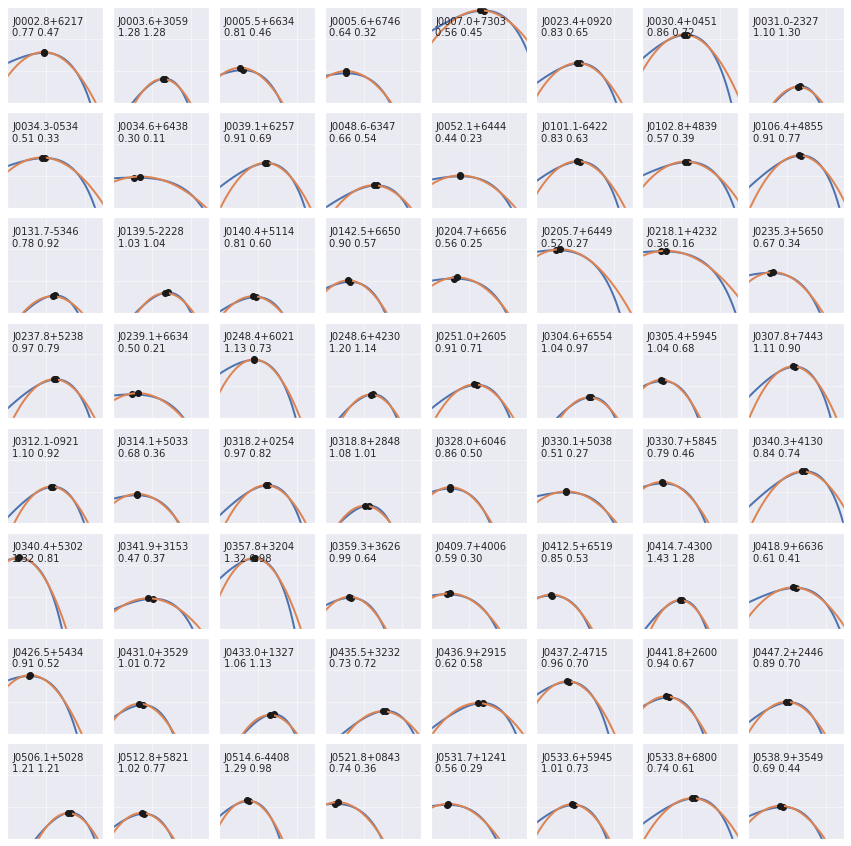

In [78]:
show(f"""## Compare LP with PLEC""")
dr4 =  Fermi4FGL('dr4')
names  = self.df.index[np.isin(self.df.index, dr4.index)]


fig, axx = plt.subplots(8,8, figsize=(15,15),
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for ax, name in zip(axx.flat, names):
    
    sfplec = dr4.get_specfunc(name, 'PLEC4')
    sflp = dr4.get_specfunc(name, 'LP')
    ep = sfplec.epeak
    d, dp = sflp.curvature(), sfplec.curvature(10**ep*1e3)
    # print(name, ep, d, dp)
    sfplec.sed_plot(ax=ax, plot_epeak=True) #label='PLEC')
    sflp.sed_plot(ax=ax, plot_epeak=True ) #label='LP')
    # logep = sflp.epeak
    # ax.plot(logep, sflp(logep), 'ok')
    ax.text(0.05, 0.9, f'{name[5:]}\n{d:.2f} {dp:.2f}', transform=ax.transAxes, fontsize=10, va='top')
    ax.set(xlim=(0.1, 30), ylim=(0.1,100),
           xticklabels=[], yticklabels=[], xlabel='',ylabel='')
show(fig)

In [74]:
name, ep, d,  sfplec.curvature(10**ep*1e3)

('4FGL J0002.8+6217',
 -0.0611181610069163,
 0.7707724739665966,
 0.4694697674271664)

In [ ]:
# # show(pulsar_curvature.__doc__)  
# def show_dp_vs_ep(self, fignum=None, df=None, **kwargs):
#     from matplotlib.gridspec import GridSpec
#     if df is None: df = self.df.copy() 
#     gs = GridSpec(1, 2,  width_ratios=[2,1], wspace=0.2, top=0.95)
#     fig = plt.figure( figsize=(15,5))
#     (ax, ax2) = [fig.add_subplot(g) for g in gs]
#     data_kw= dict(data=df, x='log_epeak', y='log_dp' )
#     size_kw = dict(size='log TS', sizes=(20,200) )
#     sns.scatterplot(**data_kw, ax=ax,  **self.hue_kw,  **size_kw ,)
     
#     xx = np.log10((0.25,6)) 
#     ax.plot(xx, pulsar_curvature(xx), 'k', ls=':');
#     axis_kw= lambda a, label, v: {f'{a}label':label,f'{a}ticks':np.log10(v), f'{a}ticklabels':v }

#     ax.set(**axis_kw('x','$E_p$ (GeV)', [0.25,0.5,1,2,4]),
#            **axis_kw('y','$d_p$', [0.25,0.5,1,2]) )
#     update_legend(ax, df, hue='source type',  fontsize=10,
#                 loc='lower right') #bbox_to_anchor=(0.85,0.75))
#     show(f"""## Examine $d_p$ vs. $E_p$ for pulsar(-like) sources """)
#     # The dotted line is the measured dependence of the mean for pulsars,
#     # $E_p = 1.1\ \mathrm{{GeV}}\ (d_p/0.46)^{{1.33}}$
#     # """)
#     # show(fig, fignum=fignum, caption=r"""Scatter plot of $d_p$ vs $E_p$ for UNID_PSR and MSP sources.
#     #   """)
    
#     # fig, ax = plt.subplots(figsize=(6,3))
#     delta_dp = df.log_dp #-pulsar_curvature(df.log_epeak)
#     sns.histplot(df, ax=ax2, x=delta_dp, **self.hue_kw, legend=False,
#                 kde='True', element='step');
#     ax2.set(xlabel=r'$\log(d_p)$', xlim=(-1,0.3));
#     # ax2.axvline(0, ls='--', color='0.6')
#     # update_legend(ax2, df, hue='source type');
#     show(fig, fignum=fignum+1 if fignum is not None else None, 
#         caption=r""" Left panel: Scatter plot of $d_p$ vs $E_p$ for UNID_PSR and MSP sources.
#         Right panel:
#         Histogram of the log curvature difference, where $\xi$ is the pulsar mean,
#         $d_p(E_p)$. """)


# show_dp_vs_ep(self, fignum=None)

# data_kw= dict(data=df, x='log_epeak', y='log_dp' )
# size_kw = dict(size='log TS', sizes=(20,200) )
# # sns.scatterplot(**data_kw, ax=ax,  **self.hue_kw,  **size_kw ,)
# fg = sns.lmplot(**data_kw, aspect=1.5,  **self.hue_kw)
# show(fig)

# df = self.df.copy()
# df.log_dp = np.log10(dr4.curvature.clip(0.1,2))
# show_dp_vs_ep(self, df=df)

# df.log_dp = np.log10(dr3.curvature.clip(0.1,2))
# show_dp_vs_ep(self, df=df)

# df = self.df
# delta_dp = df.log_dp-pulsar_curvature(df.log_epeak)
# fig, ax = plt.subplots(figsize=(10,5))
# sns.scatterplot(df, ax=ax, y=delta_dp, 
#                 # x= df.log_fpeak, #
#                 x=np.log10(df.ts.clip(25,1e4)), 
#                 **self.hue_kw);
# ax.set(ylabel=r'$\log( \Delta\ d_p)$', xlabel=r'$\log TS$', ylim=(-0.7,1.))
# ax.axhline(0,color='grey');
# show(fig)

In [ ]:
# dfx = self.fp_vs_sinb(fignum+3)
# show(f"""## Where are they? """)
# self.skyplot( fignum+4, dfx)


# show(f"""### Zoom in to Galactic ridge """)
# self.skyplot(fignum+5, dfx, xlim=(60,-60),ylim=(-30,30), 
#         xticks=np.arange(60,-61,-20),)

# df = self.df
# fig, ax = plt.subplots(figsize=(10,5))
# sns.scatterplot(df, ax=ax, x=np.log10(df.ts),
#                 y=np.log10(df.r95), **self.hue_kw);
# ax.set(xlim=(1,5))

# show(f"""### Compare `locqual` """)
# from utilities.catalogs import (UWcat, Fermi4FGL)
# uwcat = UWcat()
# uwcat.set_index('jname', inplace=True)
# locqual = uwcat.loc[df.uw_name, 'locqual'].values.clip(0.05,25)
# df = self.df
# fig, ax = plt.subplots(figsize=(10,5))
# ax= sns.scatterplot(uwcat, ax=ax, x='ts', c='0.6',
#                     y=uwcat.locqual.clip(0.05,25), alpha=0.5 )
# sns.scatterplot(df, ax=ax, x=df.ts, 
#                 y=locqual, **self.hue_kw)

# ax.set(xlim=(25,1e3),  xscale='log', yscale='log',
#       ylabel='locqual');
# show(fig, caption=f"""Gray points are all uw1410 sources""")

# summary_file = Path('files/summary.csv')
# overwrite==False
# if not summary_file.is_file() or overwrite:
#     show(f'## Write summary to `{summary_file}`')
#     df = self.df.copy()
#     df['Ep'] = np.power(10, df.log_epeak)
#     df['Fp'] = np.power(10, df.log_fpeak)
#     cols='glon glat ts r95 curvature Fp Ep'.split()+['source type']
#     rows = np.isin(df['source type'].values, 'UNID-PSR young MSP'.split())
#     df.loc[rows, cols].to_csv(summary_file, float_format='%.3f' )
# else:
#     show(f'### File `{summary_file}` exists--not overwriting.')

